In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
%env FLOWERS_MAT=conveniences/flowers.mat

env: FLOWERS_MAT=conveniences/flowers.mat


In [4]:
import random

import numpy as np
import matplotlib.pylab as plt

np.set_printoptions(formatter={'float_kind':'{:f}'.format})

import ipyplot
from conveniences.img_vec import open_img, vec_img
from conveniences.flowers import map_flower_type
from src.attention_search import attention_search

/Users/carlos/Library/Caches/pypoetry/virtualenvs/attention-search-n3PwBrvA-py3.7/lib/python3.7/site-packages/torchvision/transforms/transforms.py:210: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


# Examples

**Category Flower Dataset (Nilsback, Zisserman) - AlexNet Vectors**

In [5]:
# http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html
search_index = np.load("data/flowers_alexnet_full.npy")
paths = np.load("data/flowers_paths_full.npy").tolist()

print(search_index.shape, len(paths))

(8189, 4096) 8189


**Choosing a random image from the dataset to query against**

In [6]:
qidx = random.randrange(0, search_index.shape[0])
q: np.ndarray = search_index[qidx].reshape(1,-1)

paths[qidx]

'data/flowers/image_02027.jpg'

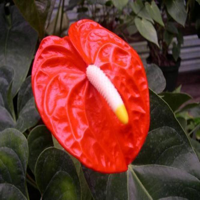

In [7]:
img = open_img(paths[qidx])
display(img)

**Perform the search**

In [8]:
found_paths, indices = attention_search(q, search_index, paths, n_results=10, full_attention=False, display_timing=True)

Searched 8189 records in 0.0111 seconds


**The resulting indices were:**

In [9]:
print(indices, qidx)

[2794 6898 7466 2792 6449 5886 7957 4916 5916 5391] 2794


In [10]:
flower_classes = [map_flower_type(p) for p in found_paths]
ipyplot.plot_images(found_paths, flower_classes, img_width=150)

**Search using an image not in the original dataset**

(4096,)


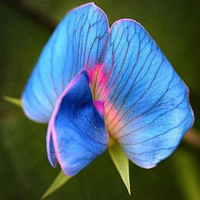

In [11]:
unseen_img = open_img("data/unseen/rare_lathyrus.jpeg", size=(200,200))
unseen_vec = vec_img(unseen_img)
uq = unseen_vec.reshape(1,-1)

display(unseen_img)

In [12]:
u_found_paths, u_indices = attention_search(uq, search_index, paths, n_results=10, full_attention=False, display_timing=True)
u_indices

Searched 8189 records in 0.0114 seconds


array([6170,  204, 6763,  563, 7751, 6178, 1975, 7822, 8167, 4941])

In [13]:
flower_classes = [map_flower_type(p) for p in u_found_paths]
ipyplot.plot_images(u_found_paths, flower_classes, img_width=150)

**[Experimental] Searching Larger Dimensions**

In [14]:
svhn_vecs: np.ndarray = np.load("data/svhn.npy")
svhn_labels: list = np.load("data/svhn_labels.npy").tolist()

svhn_qidx = random.randrange(0, svhn_vecs.shape[0], 100)
svhn_q: np.ndarray = svhn_vecs[svhn_qidx]
svhn_si: np.ndarray = svhn_vecs

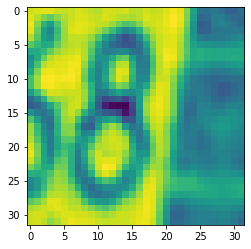

In [15]:
plt.imshow(svhn_vecs[svhn_qidx][0,::])

Searched 72501 records in 0.5771 seconds


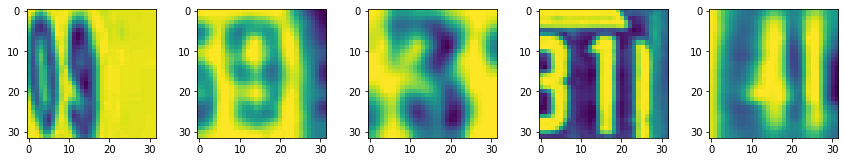

In [16]:
svhn_values, svhn_indices = attention_search(
    svhn_q, svhn_si[: svhn_qidx + 1], svhn_labels, n_results=5, full_attention=False, display_timing=True
)

fig, axes = plt.subplots(1,len(svhn_indices), figsize = (12,4))
fig.tight_layout()

# print(svhn_result)
for i, item in enumerate(zip(svhn_values, svhn_indices)):
    label, idx = item
    axes[i].imshow(svhn_vecs[idx][0,::])